<a href="https://colab.research.google.com/github/aysutnyva/Deep_learning/blob/main/training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

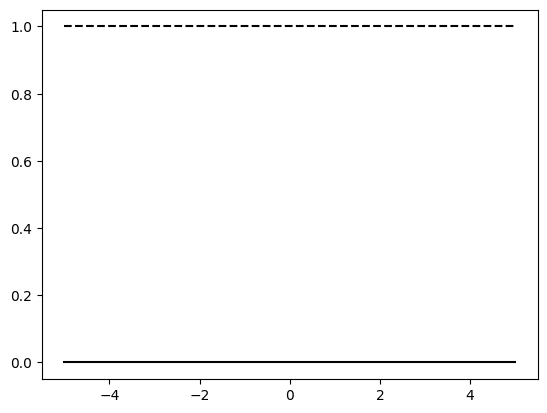

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5,5], [1, 1], 'k--')

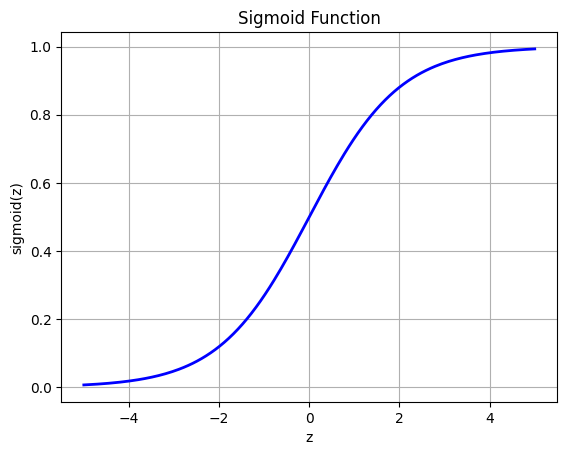

In [2]:
plt.plot(z, sigmoid(z), 'b-', linewidth=2)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

### **Xavier and He Initialization**

In [3]:
import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation='relu',
                              kernel_initializer='he_normal')

In [4]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                    distribution='uniform')
dense = tf.keras.layers.Dense(50, activation='sigmoid',
                              kernel_initializer=he_avg_init)

## **Nonsaturating Activation Functions**

### **Leaky Relu**

In [5]:
def leaky_relu(z, alpha):
  return np.maximum(alpha * z, z)

z = np.linspace(-5, 5 , 200)

In [6]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)     # defaults to alpha=0.3
dense= tf.keras.layers.Dense(50, activation=leaky_relu,
                             kernel_initializer='he_normal')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer='he_normal'),   # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2)      # activation as a separate layer
])

### **ELU**

In [8]:
dense = tf.keras.layers.Dense(50, activation='elu',
                              kernel_initializer='he_normal')

### **SELU**

SELU (Scaled Exponential Linear Unit) is only used in very deep neural networks, but there should be no layers other than dense layers, and the data must be normalized. That's why it needs a special initializer.

In [9]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                  kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [14]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.4359 - loss: 1.4905 - val_accuracy: 0.6700 - val_loss: 0.8321
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.7153 - loss: 0.7926 - val_accuracy: 0.7552 - val_loss: 0.6715
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.7647 - loss: 0.6633 - val_accuracy: 0.7874 - val_loss: 0.6022
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.7873 - loss: 0.6121 - val_accuracy: 0.8016 - val_loss: 0.5749
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8029 - loss: 0.5718 - val_accuracy: 0.7858 - val_loss: 0.5871


In [16]:
tf.random.set_seed(42)

In [17]:
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='relu',
                                  kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 32ms/step - accuracy: 0.1698 - loss: 2.0733 - val_accuracy: 0.1056 - val_loss: 2.3020
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 75s 28ms/step - accuracy: 0.1334 - loss: 2.2019 - val_accuracy: 0.1042 - val_loss: 2.3076
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.1073 - loss: 2.2869 - val_accuracy: 0.0994 - val_loss: 2.3024
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.1141 - loss: 2.2812 - val_accuracy: 0.1054 - val_loss: 2.3045
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.1072 - loss: 2.3025 - val_accuracy: 0.1054 - val_loss: 2.3024


### **GELU, Swish and Mish**

In [20]:
def swish(z, beta=1):
  return z * sigmoid(beta * z)

def approx_gelu(z):
  return swish(z, beta=1.702)

def softplus(z):
  return np.log(1 + np.exp(z))

def mish(z):
  return z * np.tanh(softplus(z))

### **Batch Normalization**

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7561 - loss: 0.7189 - val_accuracy: 0.8536 - val_loss: 0.4053
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8570 - loss: 0.4041 - val_accuracy: 0.8660 - val_loss: 0.3733


In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics= ['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7415 - loss: 0.7874 - val_accuracy: 0.8484 - val_loss: 0.4284
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8509 - loss: 0.4328 - val_accuracy: 0.8578 - val_loss: 0.3913


### **Gradient Clipping for RNN**

In [28]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [29]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

### **Reusing Pretrained Layers**

In [30]:

pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [31]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')

])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy']) # Changed: Pass 'accuracy' as a list
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5223 - loss: 1.4538 - val_accuracy: 0.7949 - val_loss: 0.6612
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8124 - loss: 0.6080 - val_accuracy: 0.8360 - val_loss: 0.4911
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8480 - loss: 0.4737 - val_accuracy: 0.8651 - val_loss: 0.4221
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8641 - loss: 0.4119 - val_accuracy: 0.8749 - val_loss: 0.3832
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8741 - loss: 0.3752 - val_accuracy: 0.8799 - val_loss: 0.3581
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8798 - loss: 0.3506 - val_accuracy: 0.8854 - val_loss: 0.3407
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8842 - loss: 0.3328 - val_accuracy: 0.8877 - val_loss: 0.3276
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8890 - loss: 0.3191 - 

In [32]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3793 - loss: 0.8090 - val_accuracy: 0.4253 - val_loss: 0.7778
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3889 - loss: 0.7845 - val_accuracy: 0.4352 - val_loss: 0.7573
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4083 - loss: 0.7634 - val_accuracy: 0.4500 - val_loss: 0.7393
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4183 - loss: 0.7443 - val_accuracy: 0.4609 - val_loss: 0.7229
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4302 - loss: 0.7270 - val_accuracy: 0.4748 - val_loss: 0.7074
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4420 - loss: 0.7109 - val_accuracy: 0.4906 - val_loss: 0.6930
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4440 - loss: 0.6956 - val_accuracy: 0.5084 - val_loss: 0.6791
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4712 - loss: 0.6807 - val_accuracy: 0.5371 - val_loss: 0.6660


[3.805528402328491, 0.38749998807907104]

In [33]:
model_A.save('my_model_A.keras') # add the .keras extension when saving

In [34]:
model_A = tf.keras.models.load_model("my_model_A.keras") # include .keras extension when loading
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [35]:
tf.random.set_seed(42)


In [36]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [37]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [38]:
for layer in model_B_on_A.layers[:-1]:
  layer.traniable = False                                     # bele edirik ki, A modelinin parametrleri deyishmesin

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5762 - loss: 0.6768 - val_accuracy: 0.6756 - val_loss: 0.6301
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7063 - loss: 0.6013 - val_accuracy: 0.7745 - val_loss: 0.5820
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7961 - loss: 0.5511 - val_accuracy: 0.8190 - val_loss: 0.5437
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8633 - loss: 0.5117 - val_accuracy: 0.8556 - val_loss: 0.5119


In [39]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8791 - loss: 0.4788 - val_accuracy: 0.8754 - val_loss: 0.4843
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9025 - loss: 0.4505 - val_accuracy: 0.8902 - val_loss: 0.4602
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9114 - loss: 0.4258 - val_accuracy: 0.8961 - val_loss: 0.4391
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9141 - loss: 0.4041 - val_accuracy: 0.9060 - val_loss: 0.4203
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9296 - loss: 0.3848 - val_accuracy: 0.9130 - val_loss: 0.4035
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9335 - loss: 0.3676 - val_accuracy: 0.9169 - val_loss: 0.3883
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9493 - loss: 0.3521 - val_accuracy: 0.9248 - val_loss: 0.3747
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9601 - loss: 0.3382 - val_accuracy: 0.9278 - val_loss: 0.3622


In [40]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - loss: 0.3069


[0.3082195818424225, 0.9160000085830688]

In [41]:
(1 - (100 - 93.67) / (100 - 88.33)) * 100

45.75835475578408

In [42]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

### **Momentum Optimization**

In [43]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [44]:
history_sgd = build_and_train_model(optimizer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6780 - loss: 0.9564 - val_accuracy: 0.8174 - val_loss: 0.5063
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8290 - loss: 0.4859 - val_accuracy: 0.8294 - val_loss: 0.4591
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8473 - loss: 0.4355 - val_accuracy: 0.8422 - val_loss: 0.4299
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8570 - loss: 0.4065 - val_accuracy: 0.8476 - val_loss: 0.4139
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8627 - loss: 0.3858 - val_accuracy: 0.8524 - val_loss: 0.4010
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8686 - loss: 0.3688 - val_accuracy: 0.8536 - val_loss: 0.3925
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8734 - loss: 0.3544 - val_accuracy: 0.8548 - val_loss: 0.3851
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8769 - loss: 0.3418 

### **Nesterov Accelerated Gradient**

In [45]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov = True)

In [46]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6801 - loss: 0.9855 - val_accuracy: 0.8222 - val_loss: 0.4855
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8345 - loss: 0.4762 - val_accuracy: 0.8388 - val_loss: 0.4337
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8525 - loss: 0.4250 - val_accuracy: 0.8522 - val_loss: 0.4065
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8617 - loss: 0.3965 - val_accuracy: 0.8554 - val_loss: 0.3941
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8671 - loss: 0.3767 - val_accuracy: 0.8570 - val_loss: 0.3829
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8724 - loss: 0.3603 - val_accuracy: 0.8634 - val_loss: 0.3732
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8765 - loss: 0.3465 - val_accuracy: 0.8638 - val_loss: 0.3678
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8807 - loss: 0.3351 

### **AdaGrad**

In [47]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1e-3)         # adagrad creates learning rate for each parameter, but it doesn't reach to the global minimum.

In [48]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5877 - loss: 1.3551 - val_accuracy: 0.7792 - val_loss: 0.6770
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7822 - loss: 0.6611 - val_accuracy: 0.8058 - val_loss: 0.5744
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8078 - loss: 0.5757 - val_accuracy: 0.8176 - val_loss: 0.5304
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8203 - loss: 0.5349 - val_accuracy: 0.8232 - val_loss: 0.5047
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8272 - loss: 0.5095 - val_accuracy: 0.8272 - val_loss: 0.4875
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8323 - loss: 0.4916 - val_accuracy: 0.8346 - val_loss: 0.4747
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8366 - loss: 0.4780 - val_accuracy: 0.8388 - val_loss: 0.4649
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8403 - loss: 0.4672 

### **RMSProp**

In [49]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)


In [50]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7608 - loss: 0.6718 - val_accuracy: 0.8508 - val_loss: 0.3933
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8534 - loss: 0.4044 - val_accuracy: 0.8528 - val_loss: 0.4064
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8681 - loss: 0.3706 - val_accuracy: 0.8630 - val_loss: 0.4026
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8735 - loss: 0.3550 - val_accuracy: 0.8448 - val_loss: 0.5486
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8780 - loss: 0.3480 - val_accuracy: 0.8596 - val_loss: 0.4627
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.3463 - val_accuracy: 0.8448 - val_loss: 0.5960
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8816 - loss: 0.3392 - val_accuracy: 0.8644 - val_loss: 0.4549
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8839 - loss: 0.3375 -

### **Adam Optimization**

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9,    # momentum
                                     beta_2 = 0.999)  # RMSProp
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7738 - loss: 0.6437 - val_accuracy: 0.8358 - val_loss: 0.4315
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8575 - loss: 0.3916 - val_accuracy: 0.8284 - val_loss: 0.4311
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8720 - loss: 0.3474 - val_accuracy: 0.8496 - val_loss: 0.4006
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8830 - loss: 0.3185 - val_accuracy: 0.8562 - val_loss: 0.3955
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8903 - loss: 0.2973 - val_accuracy: 0.8554 - val_loss: 0.4029
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8952 - loss: 0.2820 - val_accuracy: 0.8600 - val_loss: 0.4090
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9010 - loss: 0.2680 - val_accuracy: 0.8642 - val_loss: 0.3929
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9034 - loss: 0.2567

### **Adamax Optimization**

In [52]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9,
                                       beta_2 = 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7628 - loss: 0.7025 - val_accuracy: 0.8246 - val_loss: 0.4678
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8544 - loss: 0.4155 - val_accuracy: 0.8394 - val_loss: 0.4226
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8675 - loss: 0.3719 - val_accuracy: 0.8514 - val_loss: 0.4051
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8766 - loss: 0.3417 - val_accuracy: 0.8546 - val_loss: 0.3929
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8841 - loss: 0.3207 - val_accuracy: 0.8592 - val_loss: 0.3822
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8888 - loss: 0.3037 - val_accuracy: 0.8596 - val_loss: 0.3824
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8944 - loss: 0.2890 - val_accuracy: 0.8606 - val_loss: 0.3810
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8989 - loss: 0.2760 

### **AdamW Optimization**

In [53]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=1e-3,
                                      beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7722 - loss: 0.6556 - val_accuracy: 0.8336 - val_loss: 0.4448
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8579 - loss: 0.3899 - val_accuracy: 0.8428 - val_loss: 0.4122
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8724 - loss: 0.3458 - val_accuracy: 0.8550 - val_loss: 0.3895
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8822 - loss: 0.3180 - val_accuracy: 0.8622 - val_loss: 0.3751
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8891 - loss: 0.2980 - val_accuracy: 0.8612 - val_loss: 0.3775
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8941 - loss: 0.2825 - val_accuracy: 0.8702 - val_loss: 0.3713
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8976 - loss: 0.2724 - val_accuracy: 0.8758 - val_loss: 0.3544
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9038 - loss: 0.256

Nadam is Adam with Nesterov momentum.

## **Learning rate scheduling**

### **Power Scheduling**

In [55]:
# DEPRECATED:
# optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [56]:
# RECOMMENDED:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [57]:
history_power_scheduling = build_and_train_model(optimizer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6678 - loss: 0.9675 - val_accuracy: 0.8270 - val_loss: 0.4894
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8251 - loss: 0.4988 - val_accuracy: 0.8404 - val_loss: 0.4460
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8432 - loss: 0.4436 - val_accuracy: 0.8458 - val_loss: 0.4239
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8539 - loss: 0.4139 - val_accuracy: 0.8522 - val_loss: 0.4097
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8602 - loss: 0.3937 - val_accuracy: 0.8558 - val_loss: 0.4004
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8659 - loss: 0.3788 - val_accuracy: 0.8608 - val_loss: 0.3912
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8703 - loss: 0.3668 - val_accuracy: 0.8626 - val_loss: 0.3841
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8729 - loss: 0.3569 - 

## **Exponential Scheduling**

### **Avoiding Overfitting Through Regularization**

In [58]:
layers = tf.keras.layers.Dense(100, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [59]:
tf.random.set_seed(42)

In [61]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                          activation='relu',
                          kernel_initializer='he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

In [62]:
optimizer= tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6910 - loss: 4.1681 - val_accuracy: 0.8190 - val_loss: 1.8773
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8109 - loss: 1.6391 - val_accuracy: 0.8210 - val_loss: 1.1229


### **Dropout**

In [63]:
tf.random.set_seed(42)

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),                   # burda pixellerin 20%-ini atiriq
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),                    # burda amma neuronlarin 20%-ini
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [65]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2,
                                    momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6825 - loss: 0.8724 - val_accuracy: 0.8364 - val_loss: 0.4471
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8066 - loss: 0.5278 - val_accuracy: 0.8486 - val_loss: 0.4128
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8263 - loss: 0.4800 - val_accuracy: 0.8496 - val_loss: 0.4019
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8336 - loss: 0.4570 - val_accuracy: 0.8608 - val_loss: 0.3765
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8381 - loss: 0.4420 - val_accuracy: 0.8572 - val_loss: 0.3799
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8422 - loss: 0.4302 - val_accuracy: 0.8624 - val_loss: 0.3728
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8452 - loss: 0.4193 - val_accuracy: 0.8600 - val_loss: 0.3617
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8519 - loss: 0.4

Dropout edenden sonra hem train hem test datasini evaluate etmek lazimdir. Chunki accuracy-e baxanda neuronlarin mueyyen hissesini atir, amma evaluate edende butun neuronlari istifade edir deye overfit edir.

In [66]:
model.evaluate(X_train, y_train) , model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.3124
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3616
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8663 - loss: 0.3658


([0.31429970264434814, 0.8832363486289978],
 [0.34707552194595337, 0.868399977684021],
 [0.3718988299369812, 0.8640999794006348])

### **MC Dropout**

In [67]:
tf.random.set_seed(42)

In [68]:
y_probas = np.stack([model(X_test, training=True)         # training true o demekdi ki predict edende de butun neyronlari goturmesin, dropout elesin                  # np.stack hamisini birleshdirir
                    for sample in range(100)])            # 100 defe o ishi tekrarlayir  (yani 100 defe predict edir)
y_proba = y_probas.mean(axis=0)                     # 100 modelin texmininin ortalamasini qaytarir


In [69]:
model.predict(X_test[:1].round(3))                      # list gozleyir deye [:1] yaziriq

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[2.0590981e-06, 1.5650500e-06, 8.8511138e-07, 1.6841543e-05,
        8.4511057e-06, 1.4549025e-02, 2.0799255e-06, 1.4304470e-01,
        1.2887823e-05, 8.4236157e-01]], dtype=float32)

In [70]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.044, 0.   , 0.187, 0.002,
       0.767], dtype=float32)

In [75]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

np.float64(0.8661)

### **Max Norm**

In [76]:
dense = tf.keras.layers.Dense(
    100, activation='relu', kernel_initializer='he_normal',
    kernel_constraint=tf.keras.constraints.max_norm(1.))                # normallashdiranda birden artiq olsa 1e getirir

MaxNormDense = partial(tf.keras.layers.Dense,                           # funksiyani tekrarlamamaq uchun partial yaziriq
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.0))


tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7448 - loss: 0.7298 - val_accuracy: 0.8240 - val_loss: 0.4605
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8456 - loss: 0.4249 - val_accuracy: 0.8426 - val_loss: 0.4206
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8582 - loss: 0.3835 - val_accuracy: 0.8334 - val_loss: 0.4219
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8673 - loss: 0.3605 - val_accuracy: 0.8354 - val_loss: 0.4236
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8708 - loss: 0.3451 - val_accuracy: 0.8396 - val_loss: 0.4021
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8725 - loss: 0.3369 - val_accuracy: 0.8462 - val_loss: 0.4008
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3293 - val_accuracy: 0.8484 - val_loss: 0.4143
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8784 - loss: 0.3255 -